<a href="https://colab.research.google.com/github/vishesh711/Double-Pendulum/blob/main/DoublePendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MAIN

In [3]:
!pip install animation

  Preparing metadata (setup.py) ... done
  Created wheel for pychalk: filename=pychalk-2.0.1-py3-none-any.whl size=7646 sha256=2be3d90114c65490218b2c806226288b33524ae6b93d7a79246e1d76cb03016d
  Stored in directory: /root/.cache/pip/wheels/9e/7d/90/dad43fb6dfeb3c2885f5ce49bd68de2c8395a5e8e34e928916
Successfully built pychalk


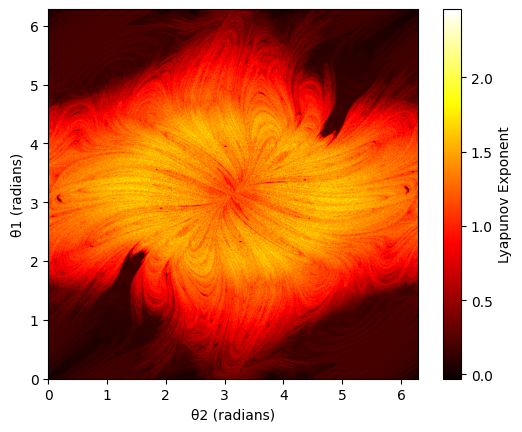

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import animation
def plot_lyapunov_heatmap(lyapunov_heatmap, theta1_range, theta2_range):
    vmin = np.min(lyapunov_heatmap)
    vmax = np.max(lyapunov_heatmap)
    extent = [theta2_range.min(), theta2_range.max(), theta1_range.min(), theta1_range.max()]
    # plt.figure(figsize=(8, 8))
    plt.imshow(lyapunov_heatmap, origin='lower', cmap='hot', extent=extent, aspect='equal')
    plt.colorbar(label='Lyapunov Exponent')
    plt.xlabel('θ2 (radians)')
    plt.ylabel('θ1 (radians)')

    # Function to format the tooltip text
    def format_coord(x, y):
        if x >= theta2_range.min() and x <= theta2_range.max() and y >= theta1_range.min() and y <= theta1_range.max():
            x_index = int(x / 2/np.pi *1260)
            y_index = int(y / 2/np.pi *1260)
            return f't1={theta1_range[y_index]:.2f}, t2={theta2_range[x_index]:.2f}, x={x_index}, y={y_index}'
        else:
            return ''

    plt.gca().format_coord = format_coord

    # Event handler for key press
    t1 = None
    t2 = None
    def on_key(event):
        global t1, t2
        if event.key == 'u':
            x, y = event.xdata, event.ydata
            if x is not None and y is not None:
                if theta2_range.min() <= x <= theta2_range.max() and theta1_range.min() <= y <= theta1_range.max():
                    x_index = int(x / (2 * np.pi) * 1260)
                    y_index = int(y / (2 * np.pi) * 1260)
                    t1 = theta1_range[y_index]
                    t2 = theta2_range[x_index]
                    print(f'Pressed u at (t1, t2): {theta1_range[y_index]}, {theta2_range[x_index]}')
                    # Debug print before calling the animation
                    print("Calling animation.animate with:", theta1_range[y_index], theta2_range[x_index])
                    animation.animate(theta1_range[y_index], theta2_range[x_index])
        if event.key == 'y':
            try:
                with open("heatmapData/output.txt", "a") as f:
                    f.write(f"{t1}, {t2}\n")
                    print(f"{t1}, {t2}\n")
            except NameError:
                print("t1 and t2 not defined")

    plt.gcf().canvas.mpl_connect('key_press_event', on_key)
    # plt.axis([0.7, 2.2, 1.2, 2.7])
    plt.show()

def read_lyapunov_heatmap_from_csv(input_file):
    lyapunov_heatmap = np.loadtxt(input_file, delimiter=',')
    return lyapunov_heatmap

# Read Lyapunov heatmap from CSV file
input_file = "/content/data.csv"
lyapunov_heatmap = read_lyapunov_heatmap_from_csv(input_file)

Hdimensions = 1260
Wdimensions = Hdimensions

theta1_range = np.linspace(0, 2 *np.pi, Hdimensions)  # Adjust the number of points as needed
theta2_range = np.linspace(0, 2 *np.pi, Wdimensions)

# Plot the Lyapunov heatmap
plot_lyapunov_heatmap(lyapunov_heatmap, theta1_range, theta2_range)

##3D

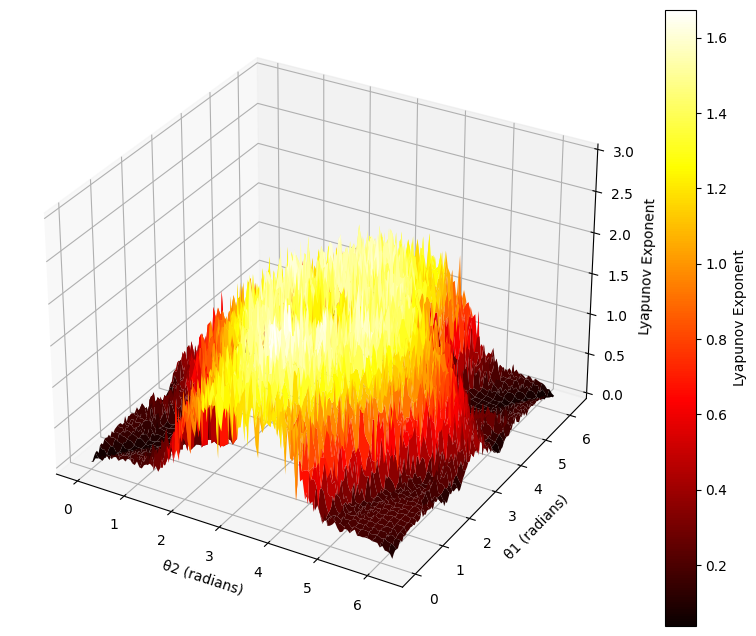

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_lyapunov_heatmap_3d(lyapunov_heatmap, theta1_range, theta2_range, downsample_factor=10):
    theta1, theta2 = np.meshgrid(theta1_range, theta2_range)

    # Downsample the data
    theta1 = theta1[::downsample_factor, ::downsample_factor]
    theta2 = theta2[::downsample_factor, ::downsample_factor]
    lyapunov_heatmap = lyapunov_heatmap[::downsample_factor, ::downsample_factor]

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(theta2, theta1, lyapunov_heatmap, cmap='hot')
    fig.colorbar(surf, label='Lyapunov Exponent')

    # Set Z-axis limits
    z_min = np.min(lyapunov_heatmap)
    z_max = 3
    ax.set_zlim(z_min, z_max)

    ax.set_xlabel('θ2 (radians)')
    ax.set_ylabel('θ1 (radians)')
    ax.set_zlabel('Lyapunov Exponent')
    plt.show()

def read_lyapunov_heatmap_from_csv(input_file):
    lyapunov_heatmap = np.loadtxt(input_file, delimiter=',')
    return lyapunov_heatmap

# Read Lyapunov heatmap from CSV file
input_file = "/content/data.csv"
#input_file = "heatmapData/1260.csv"
lyapunov_heatmap = read_lyapunov_heatmap_from_csv(input_file)

Hdimensions = 1260
Wdimensions = Hdimensions

theta1_range = np.linspace(0, 2 * np.pi, Hdimensions)  # Adjust the number of points as needed
theta2_range = np.linspace(0, 2 * np.pi, Wdimensions)

# Plot the Lyapunov heatmap in 3D with downsampling
plot_lyapunov_heatmap_3d(lyapunov_heatmap, theta1_range, theta2_range, downsample_factor=10)


##ANIMATION

In [9]:
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt
from math import cos, sin, pi
import pygame
import sys
import os

def G(y,t):
    theta1, theta2, omega1, omega2 = y
    f1 = omega1
    f2 = omega2
    f3 = (-g * (2 * m1 + m2) * sin(theta1) - m2 * g * sin(theta1 - 2 * theta2) - 2 * sin(theta1 - theta2) * m2 * (f2**2 * l2 + f1**2 * l1 * cos(theta1 - theta2))) / (l1*(2*m1 + m2 - m2 * cos(2*theta1 - 2* theta2)))
    f4 = (2 * sin(theta1-theta2) * (f1 ** 2 * l1 * (m1 + m2) + g* (m1 + m2) * cos(theta1) + f2**2 * l2 * m2 * cos(theta1- theta2))) / (l2 * (2 * m1 + m2 - m2 * cos(2*theta1 - 2* theta2)))

    return np.array([f1, f2, f3, f4])

def RK4_step(y, t, dt):
    k1 = G(y,t)
    k2 = G(y+0.5*k1*dt, t+0.5*dt)
    k3 = G(y+0.5*k2*dt, t+0.5*dt)
    k4 = G(y+k3*dt, t+dt)

    return dt * (k1 + 2*k2 + 2*k3 + k4)/6

def energy(y):
    theta1, theta2, omega1, omega2 = y
    T = 0.5* (m1 + m2) * l1**2 * omega1**2 + (m2/2) * l2**2 * omega2**2 + m2*l1*l2*omega1*omega2*cos(theta1-theta2)
    U = - (m1+m2)*l1*g*cos(theta1) - m2*l2*g*cos(theta2)
    return T + U

def update(a1, a2):
    scale = 200 * (2 / (l1 + l2))
    x1 = l1*scale * sin(a1) + offset[0]
    y1 = l1*scale * cos(a1) + offset[1]
    x2 = x1 + l2*scale * sin(a2)
    y2 = y1 + l2*scale * cos(a2)

    return (x1, y1), (x2, y2)

def render(point1, point2, prev_point, trace):
    scale = 15
    x1, y1,  = int(point1[0]), int(point1[1])
    x2, y2,  = int(point2[0]), int(point2[1])

    if prev_point:
        xp, yp = prev_point[0], prev_point[1]
        pygame.draw.line(trace, TRAILCOLOUR, (xp, yp), (x2, y2), 3)

    screen.fill(WHITE)
    screen.blit(trace, (0,0))

    pygame.draw.line(screen, BLACK, offset, (x1,y1), 5)
    pygame.draw.line(screen, BLACK, (x1,y1), (x2,y2), 5)
    pygame.draw.circle(screen, BLACK, offset, 8)
    pygame.draw.circle(screen, COLOUR1, (x1, y1), int(m1*scale))
    pygame.draw.circle(screen, COLOUR2, (x2, y2), int(m2*scale))

    return (x2, y2)

# variables
m1, m2 = 1.0, 1.0
l1, l2 = 1.0, 1.0
g = 9.81

w, h = 850, 850
WHITE = (255,255,255)
BLACK = (0,0,0)
COLOUR1 = (13, 23, 219)
COLOUR2 = (13, 23, 219)
TRAILCOLOUR = (230,230,230)
offset = (h/2, w/2)
screen = pygame.display.set_mode((w,h))
screen.fill(WHITE)
pygame.display.update()
clock = pygame.time.Clock()
screenshotTimes = [30.00]
screenshot_directory = "Images/screenshots"
# initial state

def animate(t1, t2):
    delta_t = 0.01 # increment
    totalTime = 100
    trace = screen.copy()
    t = 0
    time = np.arange(0, totalTime, delta_t)
    prev_point = []

    initial = np.array([t1, t2, 0, 0])   # [theta1, theta2, omega1, omega2]

    pygame.font.init()
    trace.fill(WHITE)
    myfont = pygame.font.SysFont('Comic Sans MS', 38)

    while True:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                sys.exit()
        point1, point2 = update(initial[0], initial[1])
        prev_point = render(point1, point2, prev_point,trace)

        t += delta_t

        initial = initial + RK4_step(initial, t, delta_t)

        clock.tick(60)
        pygame.display.update()
